🌾 GAMBIA CEREAL YIELD PREDICTION MODEL
📊 Multi-factor analysis (1961-2022)

✅ Data loaded: 62 rows, 5 columns
📅 Period: 1961-2022

📈 YIELD STATISTICS:
   Average: 1042.9 kg/ha
   Range: 461.4 - 1434.5 kg/ha
   Recent 5yr avg: 728.2 kg/ha

🔧 FEATURE ENGINEERING:
   ✅ Created 10 features

🤖 MODEL TRAINING:
   Training: 49 samples | Test: 13 samples

📊 MODEL RESULTS:
   Linear Regression : R²=0.639, RMSE=115.7 kg/ha
   Ridge Regression  : R²=0.622, RMSE=118.5 kg/ha
   Random Forest     : R²=-0.543, RMSE=239.3 kg/ha
   Gradient Boosting : R²=-0.046, RMSE=197.0 kg/ha

🏆 BEST MODEL: Linear Regression
   🎯 R²: 0.639 (63.9% variance explained)
   📏 RMSE: ±115.7 kg/hectare


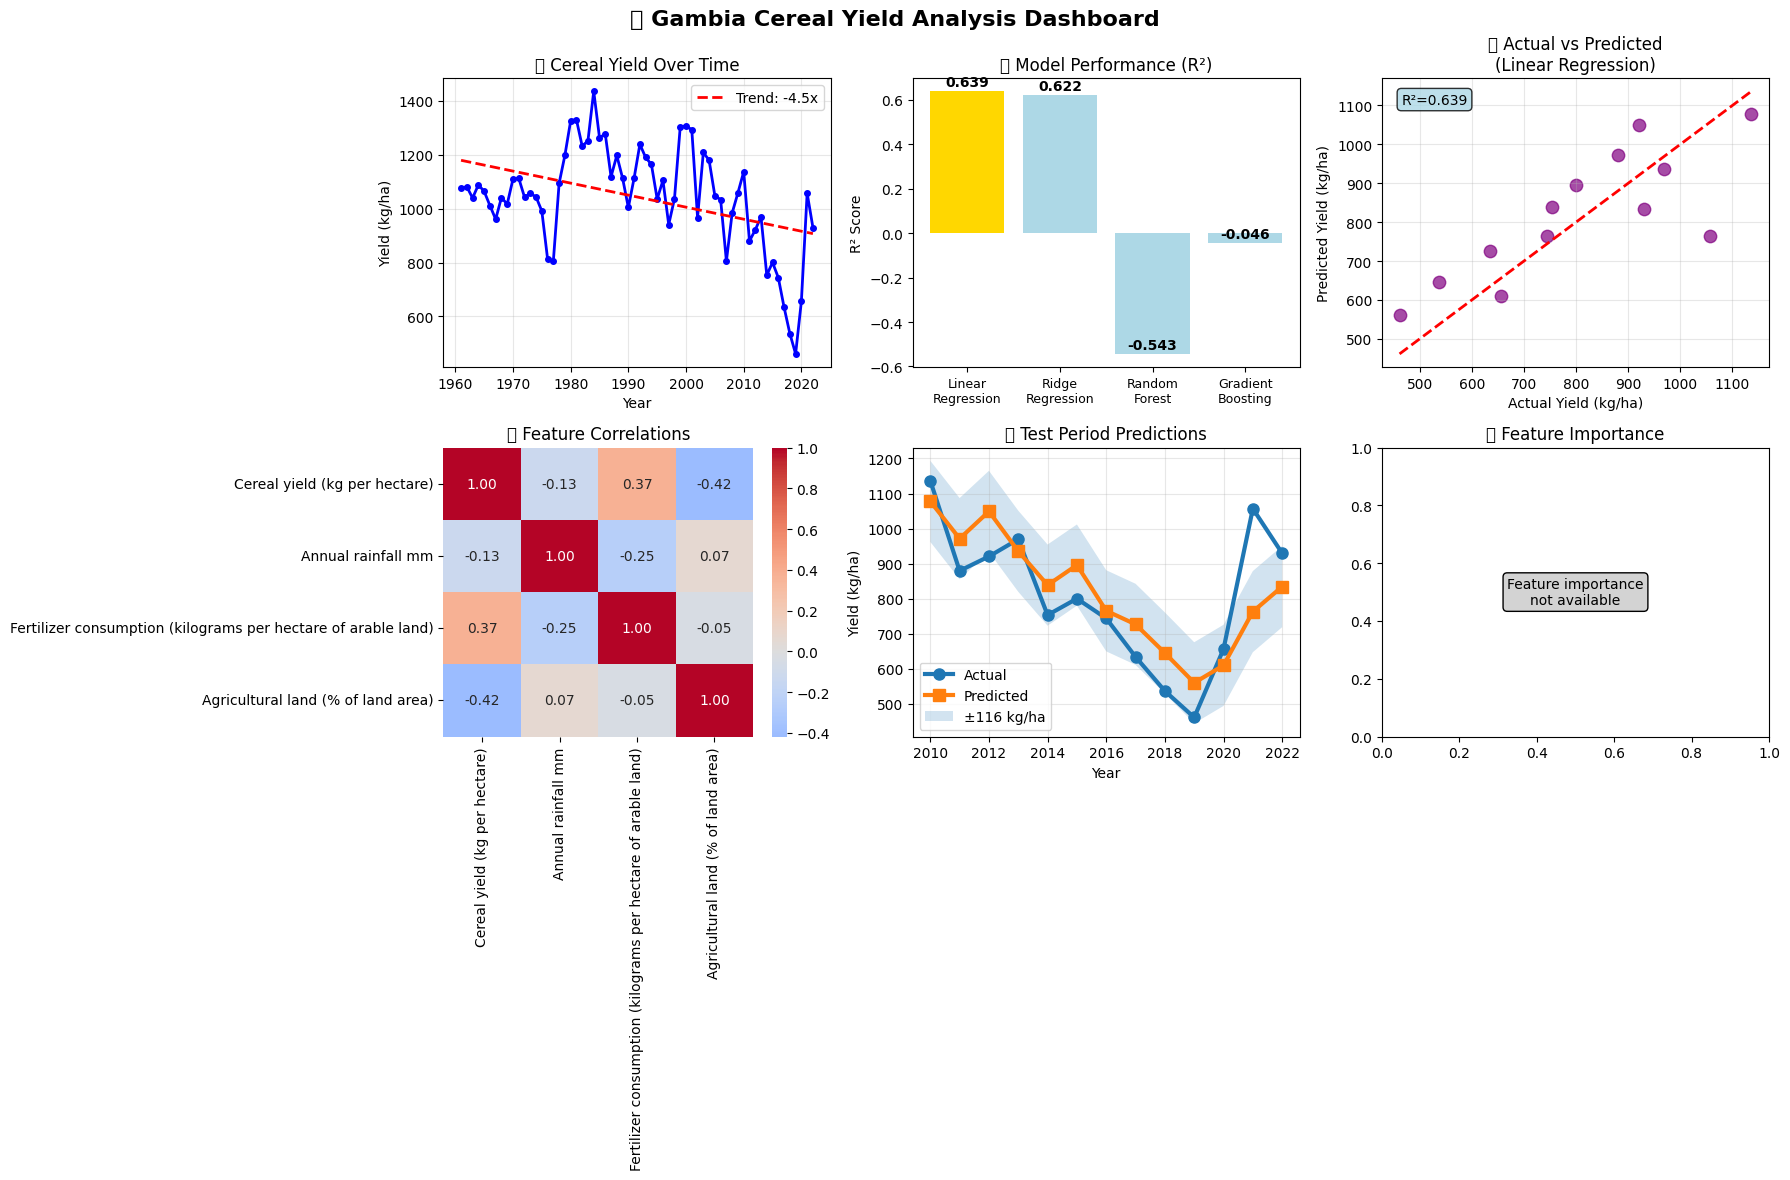


🔮 FUTURE FORECASTING:

Scenario Forecasts (2023-2027):
   Baseline            : 907 kg/ha (±116)
   Drought             : 894 kg/ha (±116)
   Improved Agriculture: 908 kg/ha (±116)


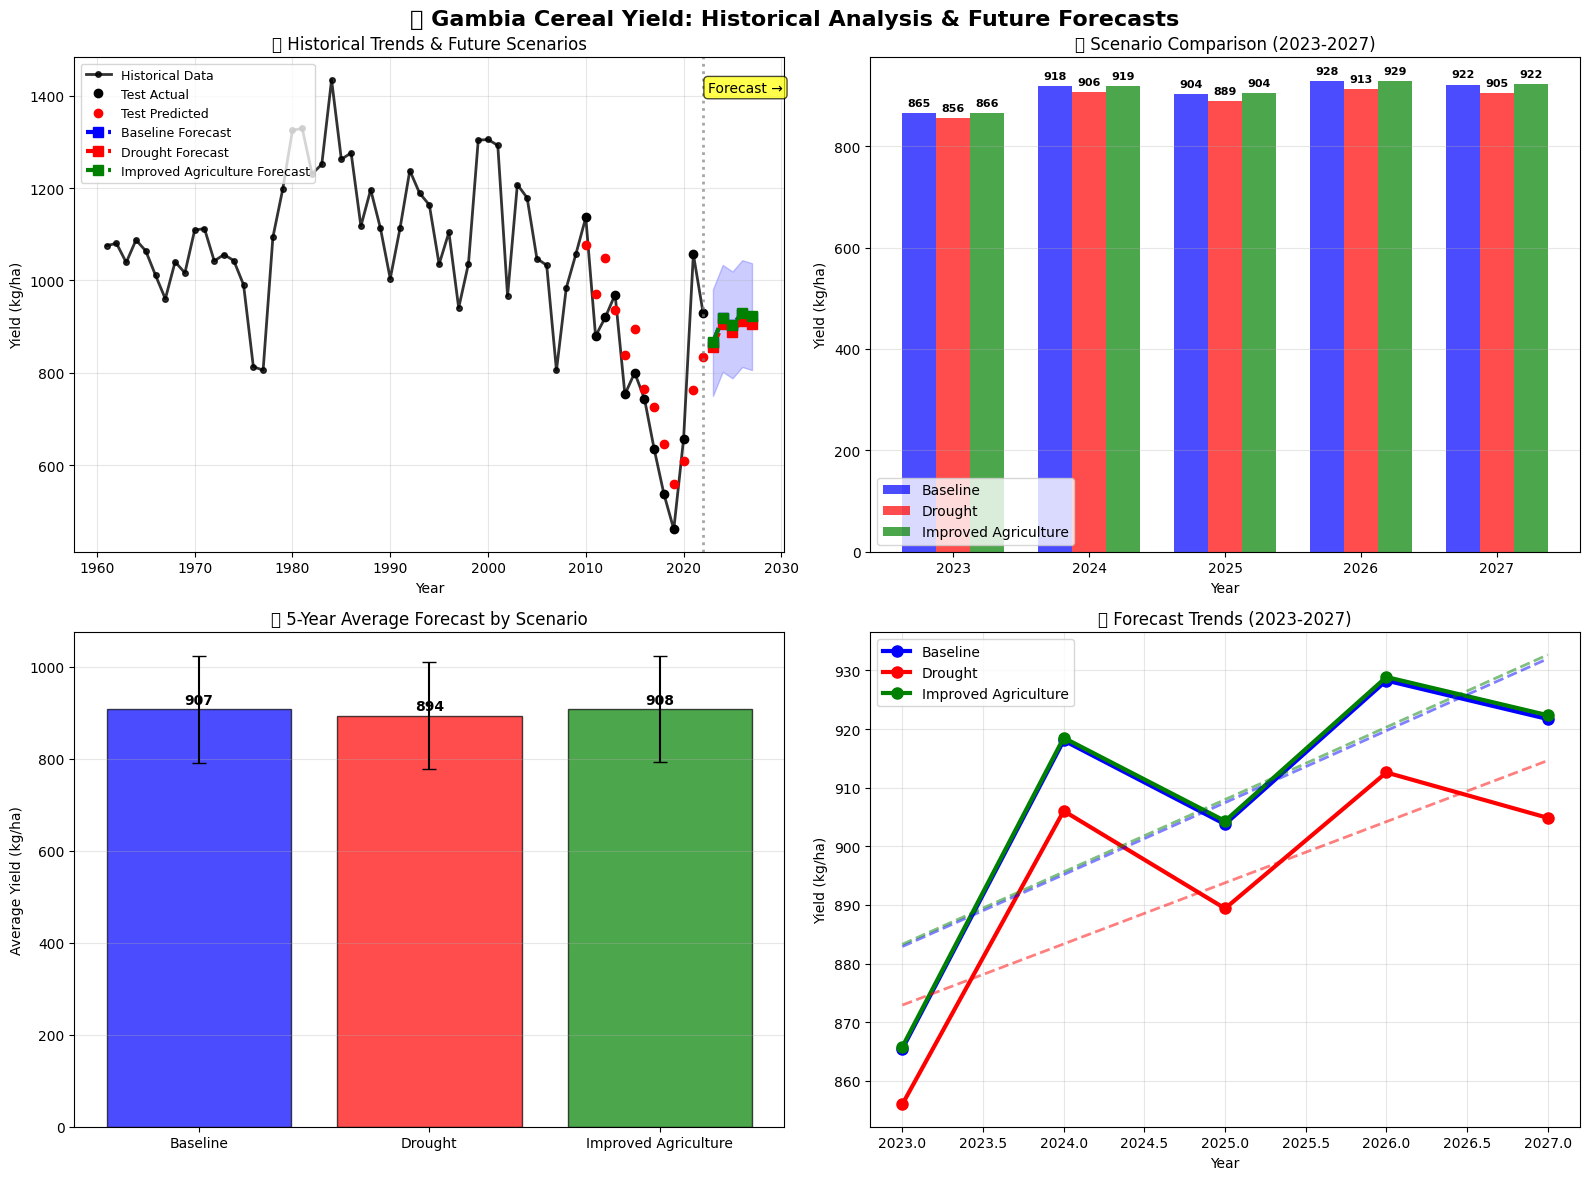


📋 KEY INSIGHTS:
   • Historical yield trend: +-4.5 kg/ha per year
   • Model explains 63.9% of yield variation
   • Rainfall correlation: -0.127
   • Fertilizer correlation: 0.374
   • Drought years show 1121 kg/ha avg yield
   • Normal years show 1028 kg/ha avg yield

🔮 FORECAST SUMMARY (2023-2027):
   • Baseline            : 865-928 kg/ha range, +12.3 kg/ha/year trend
   • Drought             : 856-913 kg/ha range, +10.4 kg/ha/year trend
   • Improved Agriculture: 866-929 kg/ha range, +12.3 kg/ha/year trend

✅ Analysis Complete! Best model: Linear Regression (R²=0.639)


In [3]:
# Gambia Cereal Yield Forecasting Model - Concise Version
# By Ousman Kassama | Date: 20th June 2025
# Dataset: Gambia_cereal_indicators_cleaned.csv (1961-2022)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

print("🌾 GAMBIA CEREAL YIELD PREDICTION MODEL")
print("📊 Multi-factor analysis (1961-2022)")

# =============================================================================
# 1. DATA LOADING & EXPLORATION
# =============================================================================

# Load data
df = pd.read_csv('Gambia_cereal_indicators_cleaned.csv')
print(f"\n✅ Data loaded: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"📅 Period: {df['Year'].min()}-{df['Year'].max()}")

# Handle missing values
df = df.fillna(method='ffill').fillna(method='bfill')

# Key statistics
target = 'Cereal yield (kg per hectare)'
print(f"\n📈 YIELD STATISTICS:")
print(f"   Average: {df[target].mean():.1f} kg/ha")
print(f"   Range: {df[target].min():.1f} - {df[target].max():.1f} kg/ha")
print(f"   Recent 5yr avg: {df.tail(5)[target].mean():.1f} kg/ha")

# =============================================================================
# 2. FEATURE ENGINEERING
# =============================================================================

print(f"\n🔧 FEATURE ENGINEERING:")

# Create enhanced features
df['Years_Since_Start'] = df['Year'] - df['Year'].min()
df['Yield_Lag1'] = df[target].shift(1)
df['Yield_MA3'] = df[target].rolling(window=3, min_periods=1).mean()
df['Rainfall_MA3'] = df['Annual rainfall mm'].rolling(window=3, min_periods=1).mean()
df['Rainfall_x_Fertilizer'] = (df['Annual rainfall mm'] * 
                               df['Fertilizer consumption (kilograms per hectare of arable land)'])

# Drought indicator
rainfall_mean = df['Annual rainfall mm'].mean()
rainfall_std = df['Annual rainfall mm'].std()
df['Drought_Indicator'] = (df['Annual rainfall mm'] < (rainfall_mean - rainfall_std)).astype(int)

# Fill any remaining NAs
df = df.fillna(method='bfill').fillna(method='ffill')

# Select features for modeling
features = [
    'Year', 'Years_Since_Start',
    'Agricultural land (% of land area)',
    'Fertilizer consumption (kilograms per hectare of arable land)',
    'Annual rainfall mm',
    'Yield_Lag1', 'Yield_MA3', 'Rainfall_MA3',
    'Rainfall_x_Fertilizer', 'Drought_Indicator'
]

X = df[features]
y = df[target]

print(f"   ✅ Created {len(features)} features")

# =============================================================================
# 3. MODEL TRAINING & EVALUATION
# =============================================================================

print(f"\n🤖 MODEL TRAINING:")

# Time series split (80% train, 20% test)
split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

print(f"   Training: {len(X_train)} samples | Test: {len(X_test)} samples")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, max_depth=6, random_state=42)
}

# Train and evaluate models
results = {}
print(f"\n📊 MODEL RESULTS:")

for name, model in models.items():
    # Use scaled features for linear models, original for tree-based
    X_train_use = X_train_scaled if 'Regression' in name else X_train
    X_test_use = X_test_scaled if 'Regression' in name else X_test
    
    # Train and predict
    model.fit(X_train_use, y_train)
    test_pred = model.predict(X_test_use)
    
    # Calculate metrics
    test_r2 = r2_score(y_test, test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
    results[name] = {
        'model': model,
        'r2': test_r2,
        'rmse': test_rmse,
        'predictions': test_pred
    }
    
    print(f"   {name:18s}: R²={test_r2:.3f}, RMSE={test_rmse:.1f} kg/ha")

# Find best model
best_name = max(results.keys(), key=lambda x: results[x]['r2'])
best_model = results[best_name]

print(f"\n🏆 BEST MODEL: {best_name}")
print(f"   🎯 R²: {best_model['r2']:.3f} ({best_model['r2']*100:.1f}% variance explained)")
print(f"   📏 RMSE: ±{best_model['rmse']:.1f} kg/hectare")

# =============================================================================
# 4. VISUALIZATION
# =============================================================================

# Create visualization dashboard
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('🌾 Gambia Cereal Yield Analysis Dashboard', fontsize=16, fontweight='bold')

# 1. Time series with trend
ax1 = axes[0, 0]
ax1.plot(df['Year'], df[target], 'b-', linewidth=2, marker='o', markersize=4)
z = np.polyfit(df['Year'], df[target], 1)
p = np.poly1d(z)
ax1.plot(df['Year'], p(df['Year']), "r--", linewidth=2, label=f'Trend: {z[0]:.1f}x')
ax1.set_title('📈 Cereal Yield Over Time')
ax1.set_xlabel('Year')
ax1.set_ylabel('Yield (kg/ha)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Model comparison
ax2 = axes[0, 1]
model_names = list(results.keys())
r2_scores = [results[name]['r2'] for name in model_names]
bars = ax2.bar(range(len(model_names)), r2_scores, color=['gold' if name == best_name else 'lightblue' for name in model_names])
ax2.set_title('🎯 Model Performance (R²)')
ax2.set_ylabel('R² Score')
ax2.set_xticks(range(len(model_names)))
ax2.set_xticklabels([name.replace(' ', '\n') for name in model_names], fontsize=9)
for i, v in enumerate(r2_scores):
    ax2.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

# 3. Actual vs Predicted
ax3 = axes[0, 2]
ax3.scatter(y_test, best_model['predictions'], alpha=0.7, s=80, c='purple')
min_val, max_val = min(min(y_test), min(best_model['predictions'])), max(max(y_test), max(best_model['predictions']))
ax3.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
ax3.set_xlabel('Actual Yield (kg/ha)')
ax3.set_ylabel('Predicted Yield (kg/ha)')
ax3.set_title(f'🎯 Actual vs Predicted\n({best_name})')
ax3.text(0.05, 0.95, f'R²={best_model["r2"]:.3f}', transform=ax3.transAxes, 
         bbox=dict(boxstyle="round", facecolor="lightblue", alpha=0.8), verticalalignment='top')
ax3.grid(True, alpha=0.3)

# 4. Correlation heatmap
ax4 = axes[1, 0]
corr_features = ['Cereal yield (kg per hectare)', 'Annual rainfall mm', 
                'Fertilizer consumption (kilograms per hectare of arable land)',
                'Agricultural land (% of land area)']
corr_matrix = df[corr_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=ax4, fmt='.2f')
ax4.set_title('🔗 Feature Correlations')

# 5. Test predictions timeline
ax5 = axes[1, 1]
test_years = df['Year'][split_idx:]
ax5.plot(test_years, y_test.values, 'o-', label='Actual', linewidth=3, markersize=8)
ax5.plot(test_years, best_model['predictions'], 's-', label='Predicted', linewidth=3, markersize=8)
ax5.fill_between(test_years, 
                best_model['predictions'] - best_model['rmse'],
                best_model['predictions'] + best_model['rmse'],
                alpha=0.2, label=f'±{best_model["rmse"]:.0f} kg/ha')
ax5.set_xlabel('Year')
ax5.set_ylabel('Yield (kg/ha)')
ax5.set_title('📅 Test Period Predictions')
ax5.legend()
ax5.grid(True, alpha=0.3)

# 6. Feature importance (if available)
ax6 = axes[1, 2]
if hasattr(best_model['model'], 'feature_importances_'):
    importance = best_model['model'].feature_importances_
    indices = np.argsort(importance)[::-1][:8]  # Top 8 features
    feature_names = [features[i].replace(' (', '\n(') for i in indices]
    ax6.barh(range(len(indices)), importance[indices], color='lightcoral')
    ax6.set_yticks(range(len(indices)))
    ax6.set_yticklabels(feature_names, fontsize=9)
    ax6.set_xlabel('Importance')
    ax6.set_title('🔍 Feature Importance')
    ax6.invert_yaxis()
else:
    ax6.text(0.5, 0.5, 'Feature importance\nnot available', ha='center', va='center',
             transform=ax6.transAxes, bbox=dict(boxstyle="round", facecolor="lightgray"))
    ax6.set_title('🔍 Feature Importance')

plt.tight_layout()
plt.show()

# =============================================================================
# 5. FORECASTING & INSIGHTS
# =============================================================================

print(f"\n🔮 FUTURE FORECASTING:")

# Create future scenarios for next 5 years (2023-2027)
future_years = list(range(2023, 2028))
scenarios = {
    'Baseline': {'rainfall_factor': 1.0, 'fertilizer_factor': 1.0, 'color': 'blue'},
    'Drought': {'rainfall_factor': 0.8, 'fertilizer_factor': 1.0, 'color': 'red'},
    'Improved Agriculture': {'rainfall_factor': 1.0, 'fertilizer_factor': 1.2, 'color': 'green'}
}

# Get recent averages for projection
recent_data = df.tail(5)
recent_rainfall = recent_data['Annual rainfall mm'].mean()
recent_fertilizer = recent_data['Fertilizer consumption (kilograms per hectare of arable land)'].mean()
recent_agri_land = recent_data['Agricultural land (% of land area)'].mean()

# Store all scenario predictions
all_predictions = {}

print(f"\nScenario Forecasts (2023-2027):")
for scenario_name, factors in scenarios.items():
    predictions = []
    
    for i, year in enumerate(future_years):
        # Create feature vector for future year
        future_features = {
            'Year': year,
            'Years_Since_Start': year - df['Year'].min(),
            'Agricultural land (% of land area)': recent_agri_land,
            'Fertilizer consumption (kilograms per hectare of arable land)': recent_fertilizer * factors['fertilizer_factor'],
            'Annual rainfall mm': recent_rainfall * factors['rainfall_factor'],
            'Yield_Lag1': df[target].iloc[-1] if i == 0 else predictions[-1],
            'Yield_MA3': df[target].tail(3).mean() if i == 0 else np.mean(predictions[-2:] + [df[target].iloc[-1]]),
            'Rainfall_MA3': recent_rainfall * factors['rainfall_factor'],
            'Rainfall_x_Fertilizer': (recent_rainfall * factors['rainfall_factor']) * (recent_fertilizer * factors['fertilizer_factor']),
            'Drought_Indicator': 1 if factors['rainfall_factor'] < 0.9 else 0
        }
        
        # Create feature array
        future_X = np.array([[future_features[f] for f in features]])
        
        # Scale if needed
        if 'Regression' in best_name:
            future_X = scaler.transform(future_X)
        
        # Predict
        pred = best_model['model'].predict(future_X)[0]
        predictions.append(pred)
    
    all_predictions[scenario_name] = predictions
    avg_prediction = np.mean(predictions)
    print(f"   {scenario_name:20s}: {avg_prediction:.0f} kg/ha (±{best_model['rmse']:.0f})")

# =============================================================================
# 6. FORECAST VISUALIZATION
# =============================================================================

# Create extended visualization with forecasts
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('🌾 Gambia Cereal Yield: Historical Analysis & Future Forecasts', fontsize=16, fontweight='bold')

# 1. Historical data + Forecasts
ax1 = axes[0, 0]
# Plot historical data
ax1.plot(df['Year'], df[target], 'k-', linewidth=2, marker='o', markersize=4, label='Historical Data', alpha=0.8)

# Plot test period predictions
test_years = df['Year'][split_idx:]
ax1.plot(test_years, y_test.values, 'ko', markersize=6, label='Test Actual')
ax1.plot(test_years, best_model['predictions'], 'ro', markersize=6, label='Test Predicted')

# Plot forecasts for each scenario
for scenario_name, predictions in all_predictions.items():
    color = scenarios[scenario_name]['color']
    ax1.plot(future_years, predictions, '--', color=color, linewidth=3, 
             marker='s', markersize=7, label=f'{scenario_name} Forecast')
    
    # Add confidence interval for baseline scenario
    if scenario_name == 'Baseline':
        ax1.fill_between(future_years, 
                        np.array(predictions) - best_model['rmse'],
                        np.array(predictions) + best_model['rmse'],
                        alpha=0.2, color=color)

# Add vertical line to separate historical from forecast
ax1.axvline(x=2022, color='gray', linestyle=':', alpha=0.7, linewidth=2)
ax1.text(2022.5, ax1.get_ylim()[1]*0.95, 'Forecast →', fontsize=10, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

ax1.set_xlabel('Year')
ax1.set_ylabel('Yield (kg/ha)')
ax1.set_title('📈 Historical Trends & Future Scenarios')
ax1.legend(loc='upper left', fontsize=9)
ax1.grid(True, alpha=0.3)

# 2. Scenario Comparison (2023-2027)
ax2 = axes[0, 1]
x_pos = np.arange(len(future_years))
width = 0.25

for i, (scenario_name, predictions) in enumerate(all_predictions.items()):
    color = scenarios[scenario_name]['color']
    ax2.bar(x_pos + i*width, predictions, width, label=scenario_name, color=color, alpha=0.7)

ax2.set_xlabel('Year')
ax2.set_ylabel('Yield (kg/ha)')
ax2.set_title('📊 Scenario Comparison (2023-2027)')
ax2.set_xticks(x_pos + width)
ax2.set_xticklabels(future_years)
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

# Add values on bars
for i, (scenario_name, predictions) in enumerate(all_predictions.items()):
    for j, pred in enumerate(predictions):
        ax2.text(j + i*width, pred + 10, f'{pred:.0f}', 
                ha='center', va='bottom', fontsize=8, fontweight='bold')

# 3. Forecast Summary Statistics
ax3 = axes[1, 0]
scenario_names = list(all_predictions.keys())
avg_yields = [np.mean(all_predictions[name]) for name in scenario_names]
colors = [scenarios[name]['color'] for name in scenario_names]

bars = ax3.bar(scenario_names, avg_yields, color=colors, alpha=0.7, edgecolor='black')
ax3.set_ylabel('Average Yield (kg/ha)')
ax3.set_title('📋 5-Year Average Forecast by Scenario')
ax3.grid(True, alpha=0.3, axis='y')

# Add values on bars
for bar, avg in zip(bars, avg_yields):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             f'{avg:.0f}', ha='center', va='bottom', fontweight='bold')

# Add uncertainty bands
for i, (bar, avg) in enumerate(zip(bars, avg_yields)):
    ax3.errorbar(bar.get_x() + bar.get_width()/2, avg, 
                yerr=best_model['rmse'], fmt='none', color='black', capsize=5)

# 4. Forecast Trends
ax4 = axes[1, 1]
for scenario_name, predictions in all_predictions.items():
    color = scenarios[scenario_name]['color']
    ax4.plot(future_years, predictions, '-o', color=color, linewidth=3, 
             markersize=8, label=scenario_name)

ax4.set_xlabel('Year')
ax4.set_ylabel('Yield (kg/ha)')
ax4.set_title('📈 Forecast Trends (2023-2027)')
ax4.legend()
ax4.grid(True, alpha=0.3)

# Add trend lines
for scenario_name, predictions in all_predictions.items():
    z_forecast = np.polyfit(future_years, predictions, 1)
    color = scenarios[scenario_name]['color']
    ax4.plot(future_years, np.poly1d(z_forecast)(future_years), 
             '--', color=color, alpha=0.5, linewidth=2)

plt.tight_layout()
plt.show()

print(f"\n📋 KEY INSIGHTS:")
print(f"   • Historical yield trend: +{z[0]:.1f} kg/ha per year")
print(f"   • Model explains {best_model['r2']*100:.1f}% of yield variation")
print(f"   • Rainfall correlation: {df['Annual rainfall mm'].corr(df[target]):.3f}")
print(f"   • Fertilizer correlation: {df['Fertilizer consumption (kilograms per hectare of arable land)'].corr(df[target]):.3f}")
print(f"   • Drought years show {df[df['Drought_Indicator']==1][target].mean():.0f} kg/ha avg yield")
print(f"   • Normal years show {df[df['Drought_Indicator']==0][target].mean():.0f} kg/ha avg yield")

print(f"\n🔮 FORECAST SUMMARY (2023-2027):")
for scenario_name, predictions in all_predictions.items():
    trend = np.polyfit(future_years, predictions, 1)[0]
    min_yield = min(predictions)
    max_yield = max(predictions)
    print(f"   • {scenario_name:20s}: {min_yield:.0f}-{max_yield:.0f} kg/ha range, {trend:+.1f} kg/ha/year trend")

print(f"\n✅ Analysis Complete! Best model: {best_name} (R²={best_model['r2']:.3f})")